In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

# Histograms

In [17]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


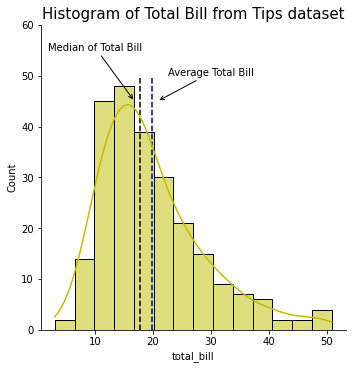

In [18]:
sns.displot(tips['total_bill'], color='y',kde=True)
plt.vlines(x=tips['total_bill'].mean(), 
           ymin=0, ymax=50,
           linestyles='dashed',
          label='Average total bill',color='darkblue')
plt.annotate('Average Total Bill', 
             xy=(tips['total_bill'].mean() + 1,45),
             xytext=(30,50),ha='center',
            arrowprops=dict(arrowstyle='->',lw=1))
plt.vlines(x=tips['total_bill'].median(), 
           ymin=0, ymax=50,
           linestyles='dashed',
          label='Median total bill',color='k')
plt.annotate('Median of Total Bill', 
             xy=(tips['total_bill'].median() - 1,45),
             xytext=(10,55),ha='center',
            arrowprops=dict(arrowstyle='->',lw=1))
plt.ylim(0,60)
plt.title('Histogram of Total Bill from Tips dataset', 
          fontdict={'fontsize':15},loc='center');
#plt.savefig('histogram.png',dpi=150, transparent=False, bbox_inches='tight')

# Boxplot

In [19]:
bill = tips['total_bill']
minn, q1, med, q3, maxx = np.percentile(bill, [0,25,50,75,100])
iqr = q3-q1

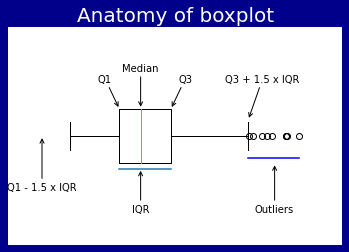

In [20]:
fig, ax = plt.subplots()
rect = fig.patch
rect.set_facecolor('darkblue')

ax.boxplot(tips['total_bill'], vert=False,
          widths=0.5)


ax.plot([q1,q3],[0.7,0.7])
ax.plot([q3+1.5*iqr,maxx],[0.8,0.8],'b-')

# for text contents
def text(name, x1, y1, x2, y2):
    return plt.annotate(name, xy=(x1,y1),xytext=(x2,y2),
                       ha='center',arrowprops=dict(arrowstyle='->',
                                                 lw=1))

text('IQR', med, 0.7, med, 0.3)
text('Q1', q1, 1.25, q1-3, 1.5)
text('Q3', q3, 1.25, q3+3, 1.5)
text('Median', med, 1.25, med, 1.6)
text('Q3 + 1.5 x IQR', q3+1.5*iqr,1.15, q3+1.5*iqr+3, 1.5)
text('Outliers',maxx-5,0.75,maxx-5,0.3)
text('Q1 - 1.5 x IQR', q1-1.5*iqr,1, q1-1.5*iqr,0.5)

# customizing borders
plt.ylim(0,2)
plt.xlim(-10,60)
ax.set_title('Anatomy of boxplot', fontdict={'fontsize':20,'color':'white'})
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#plt.savefig('boxplot_anatomy.png',dpi=150, bbox_inches='tight')

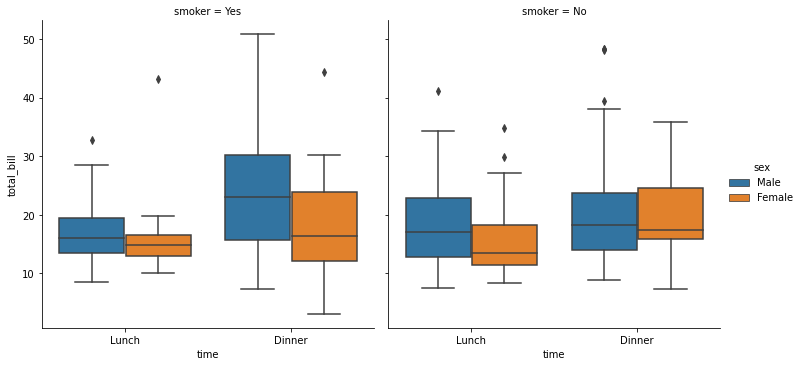

In [21]:
sns.catplot(x='time',y='total_bill',col='smoker',data=tips,
         hue='sex', kind='box');
#plt.savefig('boxplot.png',dpi=150, bbox_inches='tight')

# Scatterplots

Text(5, 9, 'corr=0.676\np_value=0.000')

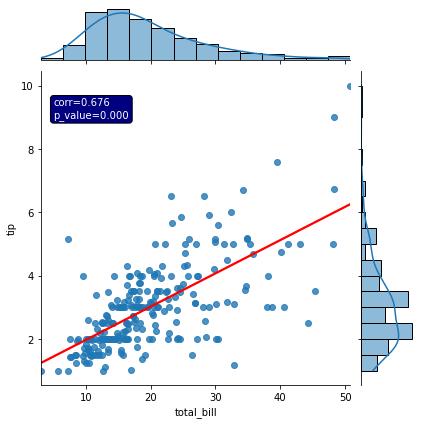

In [22]:
# for two continuous data
g = sns.jointplot(data = tips, x='total_bill',y='tip',ci=None,
                  kind='reg', line_kws={'color':'red'})
r, p = stats.pearsonr(tips.total_bill,tips.tip)
g.ax_joint.annotate(f'corr={r:.3f}\np_value={p:.3f}', 
             xytext=(5,9), xy=(5,9),ha='left',color='white',
                   bbox={'boxstyle':'round','fc':'navy'})

#plt.savefig('scatter.png',dpi=150,bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


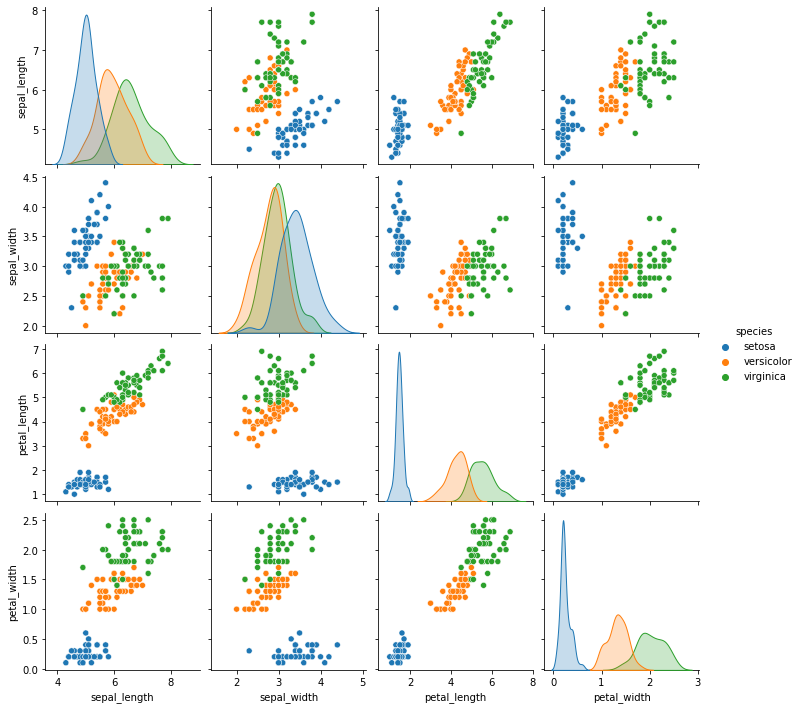

In [23]:
iris = sns.load_dataset('iris')
iris.info()

sns.pairplot(iris, hue='species')
#plt.savefig('scatter_pairs.png',dpi=150,bbox_inches='tight')

In [24]:
gapminder = px.data.gapminder()
px.scatter(data_frame=gapminder,
          x='gdpPercap',
          y='lifeExp',
          size='pop',
          color='continent',
          title='Life Span and Wealth (1952 - 2007)',
          labels={'gdpPercap':'Wealth','lifeExp':'Life Span'},
          log_x=True,
          range_y=[25,95],
          hover_name='country',
          animation_frame='year',
          size_max=100,
          height=600)

# Bar chart

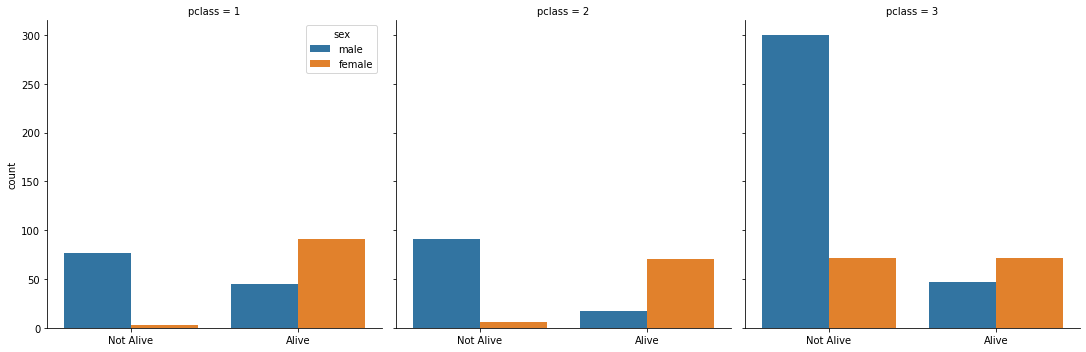

In [25]:
titanic = sns.load_dataset('titanic')

titanic.head()

g = sns.catplot(x='alive', col='pclass',data=titanic, kind='count', hue='sex',legend_out=False)
g.set_axis_labels("").set_xticklabels(['Not Alive','Alive'])
#plt.savefig('barchart.png',dpi=150,bbox_inches='tight')

In [26]:
#?sns.catplot

# Line chart

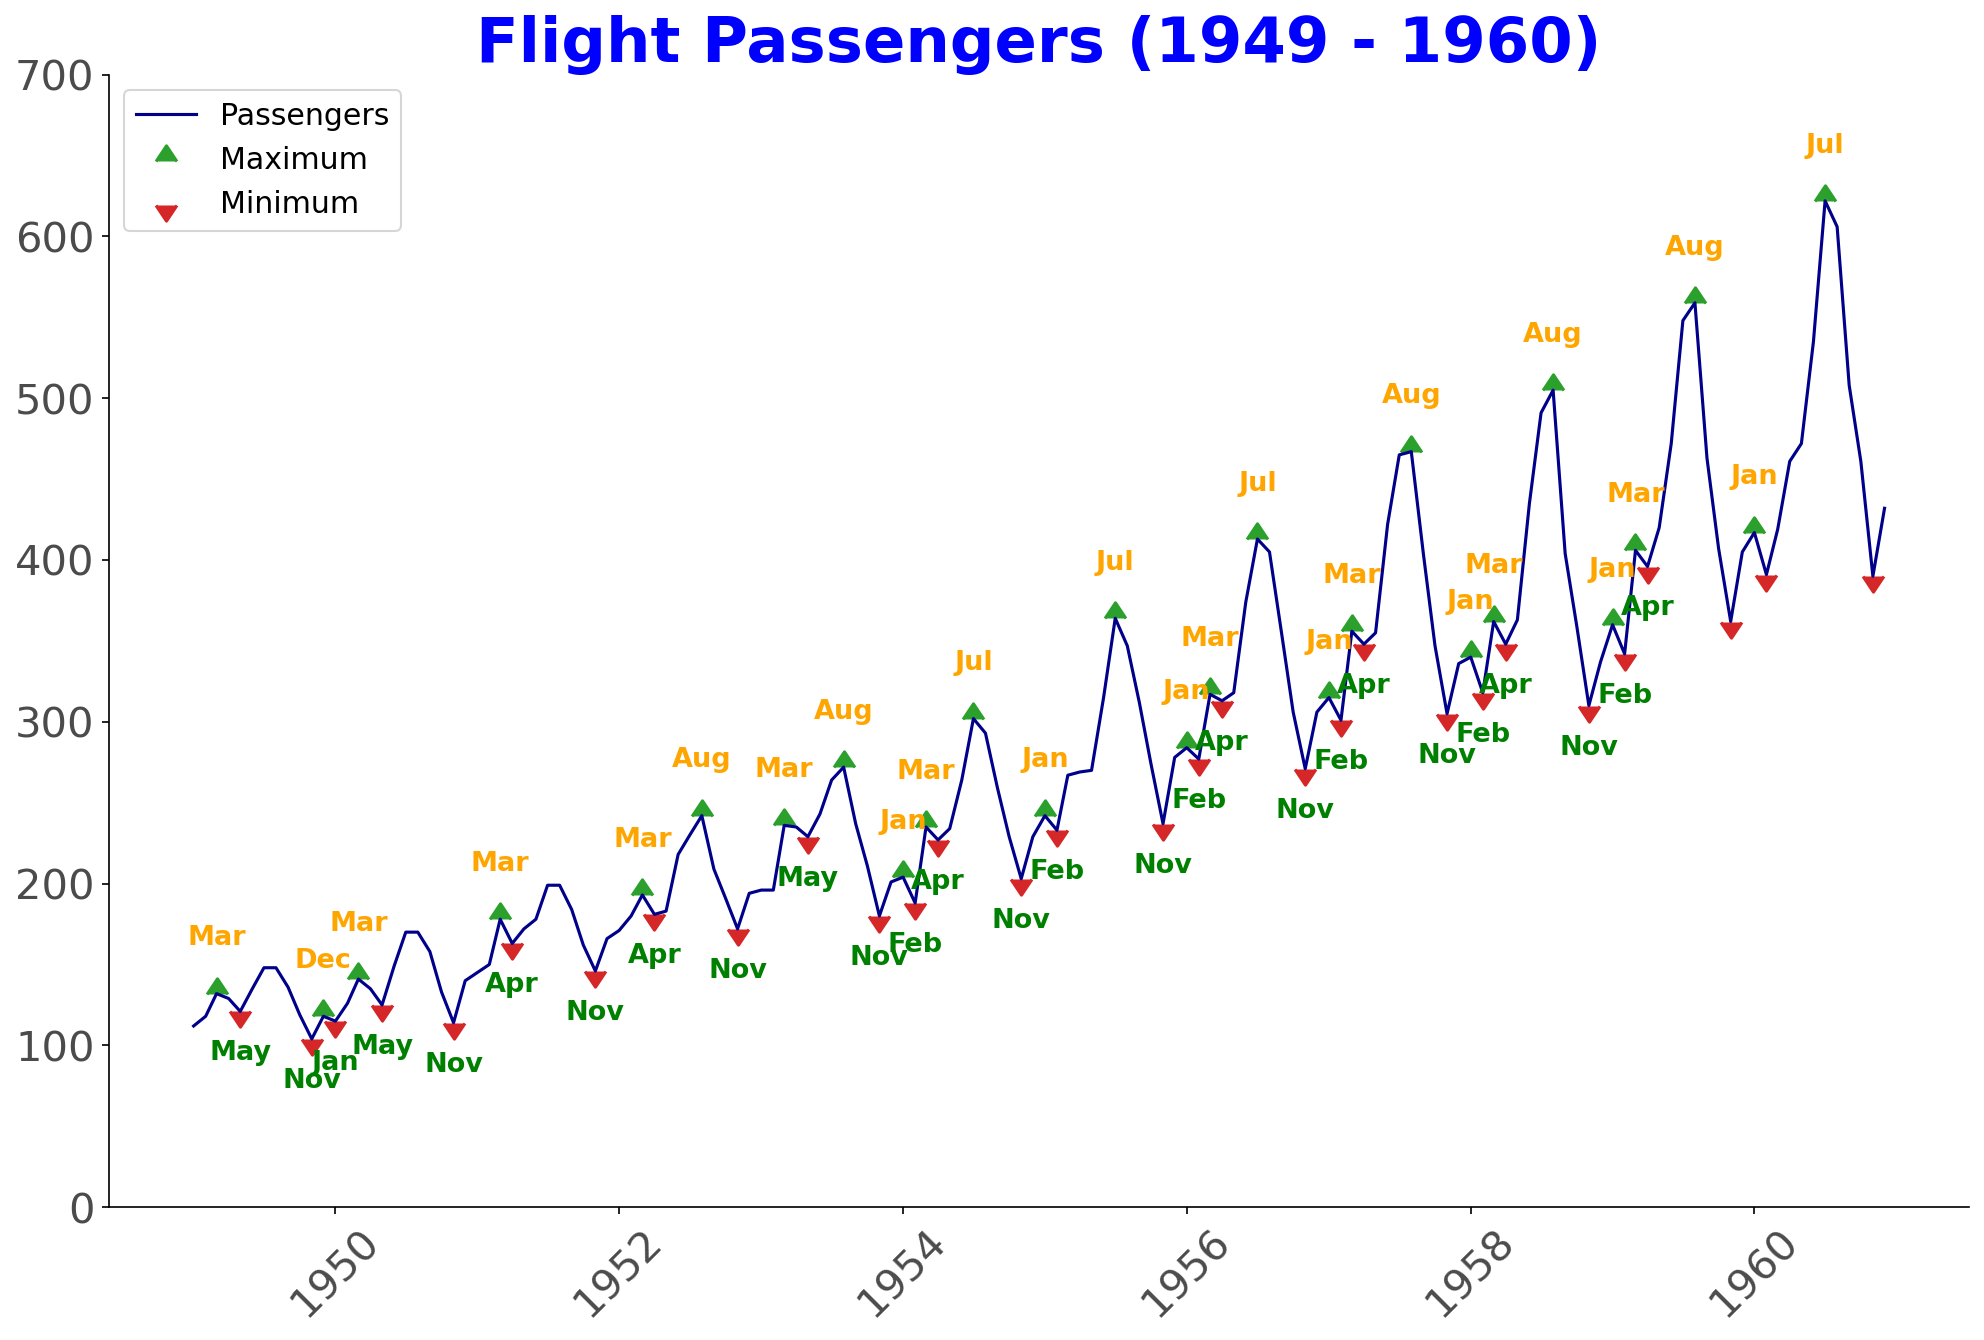

In [27]:
flight = sns.load_dataset('flights')

flight['date'] = flight['year'].astype('str') + '/' + flight['month'].astype('str') + '/01'
flight['date'] = pd.to_datetime(flight['date'])

passengers = flight['passengers'].values
diffs = np.diff(np.sign(np.diff(passengers)))
maxs = np.where(diffs == -2)[0] + 1

diffs2 = np.diff(np.sign(np.diff(-1*passengers)))
mins = np.where(diffs2 == -2)[0] + 1

# ?np.diff
# ?np.sign
# above calculation
# suppose 4 numbers - [1,2,5,4]
# first np.diff returns difference between two consecutive numbers
# this example, it will return [1,3,-1]
# np.sign returns positive or negative number
# it will return [1, 1, -1]
# np.diff return [0,-2]
# in this series, 5 is local maximum and the index of -2's plus 1 will give 
# the local maximum numbers and for local minimum, reverse the magnitude of 
# numbers. 

import matplotlib as mpl
plt.figure(figsize=(16,10),dpi=150)

# basic plotting of line chart
plt.plot('date','passengers',data=flight,c='darkblue',label='Passengers')

# plot the local minimum and maximum points
plt.scatter(flight.date[maxs], flight.passengers[maxs],
           marker=mpl.markers.CARETUPBASE, color='tab:green',s=100,
           label="Maximum")
plt.scatter(flight.date[mins], flight.passengers[mins],
           marker=mpl.markers.CARETDOWNBASE, color='tab:red',s=100,
           label="Minimum")

# for adding text
for d, u in zip(mins, maxs):
    plt.text(flight.date[d], flight.passengers[d]-30, flight.month[d],ha='center',color='green',
            fontdict={'fontsize':13, 'weight':'bold'})
    plt.text(flight.date[u], flight.passengers[u]+30, flight.month[u],ha='center',color='orange',
            fontdict={'fontsize':13, 'weight':'bold'})


# customize the graph grids 
plt.ylim(0,700)
plt.xticks(fontsize=20, rotation=45,alpha=0.7)
plt.yticks(fontsize=20,alpha=0.7)
plt.legend(loc='upper left',fontsize='x-large')
plt.title("Flight Passengers (1949 - 1960)",fontdict={'fontsize':30,'fontweight':'bold',
                                                    'ha':'center','color':'blue'})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

#plt.savefig('lineplot.png',dpi=150,bbox_inches='tight')